In [58]:
import json
import numpy as np
import pandas as pd
import math
from collections import defaultdict
from sklearn import linear_model
import random
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
f = open("review-Alabama_10.json")
review_df = []
for l in f:
    review_df.append(json.loads(l))
f.close()

In [3]:
review_df[0]

{'user_id': '114043824230907811356',
 'name': 'Kanisha Mixon',
 'time': 1597168272670,
 'rating': 5,
 'text': 'Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!',
 'pics': None,
 'resp': None,
 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'}

In [4]:
#Cleaning data to not include observations with "None" review
data = [review for review in review_df if review['text'] is not None]
data[0]

{'user_id': '114043824230907811356',
 'name': 'Kanisha Mixon',
 'time': 1597168272670,
 'rating': 5,
 'text': 'Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!',
 'pics': None,
 'resp': None,
 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf'}

In [5]:
len(data)

2700714

In [6]:
#Convert unix time to datetime
from datetime import datetime

# Function to convert Unix time in milliseconds to a readable date format
def convert_unix_time_to_readable(unix_time_ms):
    unix_time_s = unix_time_ms / 1000  # Convert from milliseconds to seconds
    dt_object = datetime.utcfromtimestamp(unix_time_s)
    return dt_object.strftime('%Y-%m-%d %H:%M:%S')  # Format the date

for review in review_df:
    if review['time'] is not None:
        review['readable_time'] = convert_unix_time_to_readable(review['time'])

In [7]:
#Parse Data Time
import dateutil.parser

for d in data:
    t = dateutil.parser.parse(d['readable_time'])
    d['parsed_date'] = t

In [8]:
data[0]

{'user_id': '114043824230907811356',
 'name': 'Kanisha Mixon',
 'time': 1597168272670,
 'rating': 5,
 'text': 'Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!',
 'pics': None,
 'resp': None,
 'gmap_id': '0x8862134e67ff5c87:0x38b5e2ae99cd1fcf',
 'readable_time': '2020-08-11 17:51:12',
 'parsed_date': datetime.datetime(2020, 8, 11, 17, 51, 12)}

In [9]:
#Subsetting data to first 50,000 observations
dataset = data[:50000]

In [10]:
#Train a simple predictor that estimates rating from review length and time

In [11]:
# Find the maximum review length
max_length = max(len(d['text']) for d in dataset)
max_length

4089

In [12]:
#One-Hot encode hours, weeks, and months
def one_hot_weekday(weekday):
    return [1 if i == weekday else 0 for i in range(6)]

def one_hot_month(month):
    return [1 if i == month-1 else 0 for i in range(11)]

def one_hot_hour(hour):
    return [1 if i == hour else 0 for i in range(23)]

def feature(d):
    feat = [1]
    feat.append(len(d['text']) / max_length)
    feat.extend(one_hot_weekday(t.weekday()))
    feat.extend(one_hot_month(t.month))
    feat.extend(one_hot_month(t.hour))
    return feat

In [13]:
feature = [feature(d) for d in dataset]
ratings = [d['rating'] for d in dataset]

In [14]:
#Creating X and Y
X = np.matrix(feature)
Y = np.matrix(ratings).T

In [15]:
#Fitting a model
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X, Y)
y_pred = model.predict(X)
theta = model.coef_
theta

/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning

array([[-7.69217925e+10, -5.86488067e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.84608962e+10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.84608962e+10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [50]:
#Calculating MSE
sse = sum([x**2 for x in (Y - y_pred)])
mse = sse / len(Y)
mse = mse[0, 0]

mse

/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


1.3938920546221734

In [19]:
print(Y.shape)
print(y_pred.shape)

(50000, 1)
(50000, 1)


In [20]:
def plot_residuals(y_actual, y_predicted, title="Residual Plot"):
    # Convert y_actual and y_predicted to arrays
    y_actual = np.array(y_actual)
    y_predicted = np.array(y_predicted)

    # Check if the arrays are 2D and reshape if needed
    if len(y_actual.shape) == 2:
        y_actual = y_actual.flatten()
    if len(y_predicted.shape) == 2:
        y_predicted = y_predicted.flatten()

    # Calculate residuals
    residuals = y_actual - y_predicted

    # Create the residual plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_predicted, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()


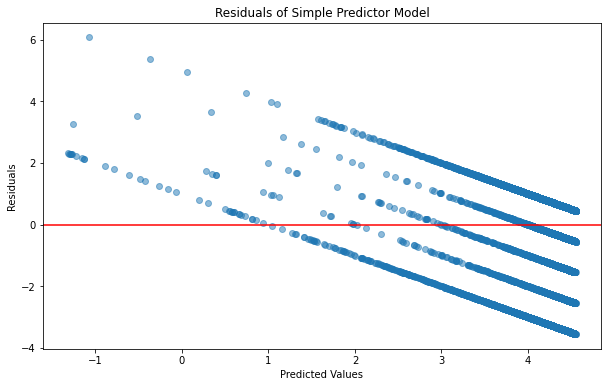

In [21]:
# Plot residuals for the simple predictor model
plot_residuals(Y, y_pred, title="Residuals of Simple Predictor Model")

In [67]:
#Training a Simple Model Using Response Length

In [58]:
#Checking how responses are formatted
num_responses_to_print = 10

# Iterate through the dataset and print the responses
for i, record in enumerate(dataset):
    if i < num_responses_to_print:
        response = record['resp'] if record['resp'] is not None else "No response"
        print(f"Response {i+1}: {response}")
    else:
        break

Response 1: No response
Response 2: No response
Response 3: No response
Response 4: No response
Response 5: No response
Response 6: {'time': 1545580599480, 'text': "Our team loves being able to help, Ellen! Glad you enjoyed coming in to figure out the best items. If you need anything, we're always here for you. -Lisa V., Owner"}
Response 7: {'time': 1545668611183, 'text': "I hope it's not too late to thank you for this, Jacqueline -- we love helping out however we can. If you need anything else, feel free to stop by or give us a call. -Lisa V., Owner"}
Response 8: {'time': 1551991855460, 'text': "Happy you stopped in, Tammie! Hoping you'll make it back our way again soon. -Lisa V., Owner"}
Response 9: No response
Response 10: No response


In [22]:
#Calculating maximum response length
#If response is None, length = 0
max_resp_length = max(len(d['resp']['text']) if d['resp'] is not None and 'text' in d['resp'] else 0 for d in dataset)
max_resp_length

2615

In [23]:
def feature(d):
    resp_length = len(d['resp']) if d['resp'] is not None else 0
    normalized_resp_length = resp_length / max_resp_length if max_resp_length > 0 else 0
    return [1, normalized_resp_length]

In [24]:
response = [feature(d) for d in dataset]
ratings = [d['rating'] for d in dataset]

In [25]:
#Creating X and Y
X = np.matrix(response)
Y = np.matrix(ratings).T

In [26]:
resp_model = linear_model.LinearRegression(fit_intercept=False)
resp_model.fit(X, Y)
y_pred = resp_model.predict(X)
theta = resp_model.coef_
theta

/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning

array([[ 4.36298463, 58.29883714]])

In [27]:
sse = sum([x**2 for x in (Y - y_pred)])
mse = sse / len(Y)
mse = mse[0, 0]

mse

1.4832036022129724

/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


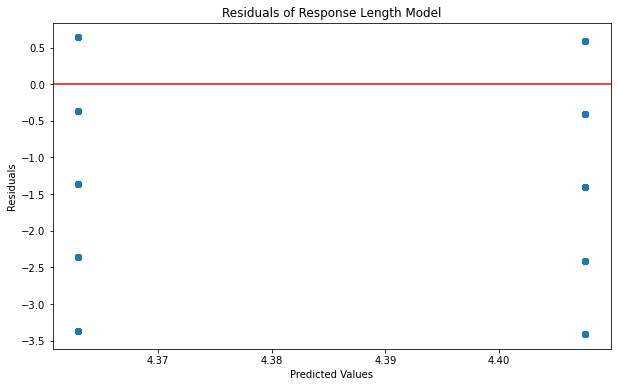

In [28]:
y_pred = resp_model.predict(X)

# Plot residuals for the response length model
plot_residuals(Y, y_pred, title="Residuals of Response Length Model")


In [29]:
#Combined Model - Using all features

In [30]:
#Model with length of review, time, length of response, if pictures were included

In [31]:
def feature(d):
    feat = [1]
    feat.append(len(d['text']) / max_length) 
    feat.extend(one_hot_weekday(t.weekday()))
    feat.extend(one_hot_month(t.month))
    feat.extend(one_hot_month(t.hour))

    resp_length = len(d['resp']) if d['resp'] is not None else 0
    feat.append(resp_length / max_resp_length)
    
    feat.append(1 if d['pics'] is not None else 0)

    return feat

In [32]:
features = [feature(d) for d in dataset]
ratings = [d['rating'] for d in dataset]

In [33]:
X = np.matrix(features)
Y = np.matrix(ratings).T

In [34]:
combined_model = linear_model.LinearRegression(fit_intercept=False)
combined_model.fit(X, Y)
y_pred = combined_model.predict(X)
theta = combined_model.coef_
theta

/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning

array([[-7.02603323e+12, -6.02746744e+00,  9.02683452e+05,
         4.73454590e+01,  3.65812266e+00,  0.00000000e+00,
         1.14408444e+12,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.88194879e+12,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.65198463e+02,  3.49223389e-01]])

In [35]:
sse = sum([x**2 for x in (Y - y_pred)])
mse = sse / len(Y)
mse = mse[0, 0]

mse

1.3879576796913147

/Users/amber/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


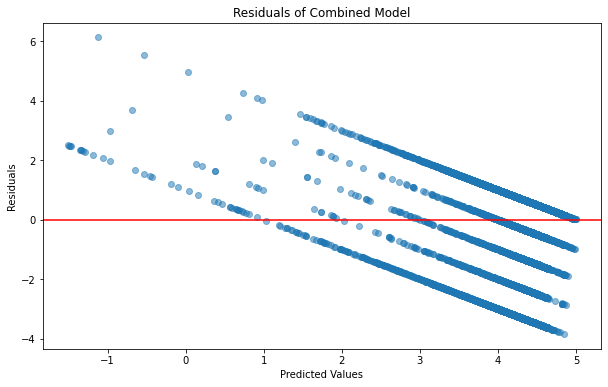

In [36]:
y_pred = combined_model.predict(X)

plot_residuals(Y, y_pred, title="Residuals of Combined Model")


In [37]:
#Validating Simple Regression Model

In [38]:
#Setting up max review an max response length for entire cleaned data
max_length = max(len(d['text']) for d in data)
max_resp_length = max(len(d['resp']['text']) if d['resp'] is not None and 'text' in d['resp'] else 0 for d in data)
print(max_length)
print(max_resp_length)

6001
3993


In [39]:
#Shuffle data to avoid biases
random.seed(0)
random.shuffle(data)

In [40]:
#Subsetting dataset into Training and Testing 
dataTrain = data[:50000]
dataValid = data[50000:100000]
dataTest = data[100000:150000]

In [41]:
#Predicting positive ratings (3 or greater)
yTrain = [d['rating'] >= 3 for d in dataTrain]
yValid = [d['rating'] >= 3 for d in dataValid]
yTest = [d['rating'] >= 3 for d in dataTest]

In [48]:
#Predicting numerical ratings
yTrain_num = [d['rating'] for d in dataTrain]
yValid_num = [d['rating'] for d in dataValid]
yTest_num = [d['rating'] for d in dataTest]

In [42]:
# Define the feature function with lengths as parameters
def feature(d, max_length, max_resp_length):
    feat = [1]
    feat.append(len(d['text']) / max_length) 

    t = dateutil.parser.parse(d['readable_time'])
    feat.extend(one_hot_weekday(t.weekday()))
    feat.extend(one_hot_month(t.month))
    feat.extend(one_hot_hour(t.hour))

    resp_length = len(d['resp']) if d['resp'] is not None else 0
    feat.append(resp_length / max_resp_length)
    
    feat.append(1 if d['pics'] is not None else 0)

    return feat

In [43]:
#from sklearn.linear_model import LogisticRegression

# Define the pipeline function
def pipeline(reg, dataTrain, dataValid, dataTest, yTrain, yValid, yTest, max_length, max_resp_length):
    mod = LogisticRegression(C=reg, class_weight='balanced')

    Xtrain = [feature(d, max_length, max_resp_length) for d in dataTrain]
    Xvalid = [feature(d, max_length, max_resp_length) for d in dataValid]
    Xtest = [feature(d, max_length, max_resp_length) for d in dataTest]
    
    mod.fit(Xtrain, yTrain)
    ypredValid = mod.predict(Xvalid)
    ypredTest = mod.predict(Xtest)

    # Validation
    TP = sum([(a and b) for (a, b) in zip(yValid, ypredValid)])
    TN = sum([(not a and not b) for (a, b) in zip(yValid, ypredValid)])
    FP = sum([(not a and b) for (a, b) in zip(yValid, ypredValid)])
    FN = sum([(a and not b) for (a, b) in zip(yValid, ypredValid)])

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    vBER = 1 - 0.5 * (TPR + TNR)
    print("C = " + str(reg) + "; validation BER = " + str(vBER))

    # Test
    TP = sum([(a and b) for (a, b) in zip(yTest, ypredTest)])
    TN = sum([(not a and not b) for (a, b) in zip(yTest, ypredTest)])
    FP = sum([(not a and b) for (a, b) in zip(yTest, ypredTest)])
    FN = sum([(a and not b) for (a, b) in zip(yTest, ypredTest)])

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    tBER = 1 - 0.5 * (TPR + TNR)
    print("C = " + str(reg) + "; test BER = " + str(tBER))

    return mod, vBER, tBER

In [44]:
#Tuning C
best_C = None
best_vBER = float('inf')
best_tBER = float('inf')

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    _, vBER, tBER = pipeline(c, dataTrain, dataValid, dataTest, yTrain, yValid, yTest, max_length, max_resp_length)
    print(f"C = {c}; Validation BER: {vBER}, Test BER: {tBER}")

    if vBER < best_vBER:
        best_C = c
        best_vBER = vBER
        best_tBER = tBER

print(f"Best C: {best_C}, Best Validation BER: {best_vBER}, Best Test BER: {best_tBER}")


C = 0.001; validation BER = 0.47202592885209893
C = 0.001; test BER = 0.4707742928921901
C = 0.001; Validation BER: 0.47202592885209893, Test BER: 0.4707742928921901
C = 0.01; validation BER = 0.42926650841177616
C = 0.01; test BER = 0.4336540383860571
C = 0.01; Validation BER: 0.42926650841177616, Test BER: 0.4336540383860571
C = 0.1; validation BER = 0.37281183540077223
C = 0.1; test BER = 0.3750971941040514
C = 0.1; Validation BER: 0.37281183540077223, Test BER: 0.3750971941040514
C = 1; validation BER = 0.3633908104168644
C = 1; test BER = 0.36400684351451407
C = 1; Validation BER: 0.3633908104168644, Test BER: 0.36400684351451407
C = 10; validation BER = 0.36319396074937027
C = 10; test BER = 0.3630690740255098
C = 10; Validation BER: 0.36319396074937027, Test BER: 0.3630690740255098
C = 100; validation BER = 0.3626061950636674
C = 100; test BER = 0.3632271866300768
C = 100; Validation BER: 0.3626061950636674, Test BER: 0.3632271866300768
Best C: 100, Best Validation BER: 0.362606

In [45]:
# Call the pipeline function with C = 100
model, vBER, tBER = pipeline(100, dataTrain, dataValid, dataTest, yTrain, yValid, yTest, max_length, max_resp_length)

C = 100; validation BER = 0.3626061950636674
C = 100; test BER = 0.3632271866300768


In [49]:
# Train model on the training data
X_train = [feature(d, max_length, max_resp_length) for d in dataTrain]

# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False)  # MSE + 1.0 l2
clf.fit(X_train, yTrain_num)
theta = clf.coef_

In [50]:
X_valid = [feature(d, max_length, max_resp_length) for d in dataValid]
X_test = [feature(d, max_length, max_resp_length) for d in dataTest]

In [51]:
predictions_valid = clf.predict(X_valid)
predictions_test = clf.predict(X_test)

In [52]:
# Calculate MSE
mse_valid = mean_squared_error(yValid_num, predictions_valid)
mse_test = mean_squared_error(yTest_num, predictions_test)
print("Validation MSE:", mse_valid)
print("Test MSE:", mse_test)

Validation MSE: 1.3284082109787654
Test MSE: 1.3438885745631497


In [53]:
# Calculate accuracy
threshold = 3
binary_predictions_valid = [1 if p >= threshold else 0 for p in predictions_valid]
binary_predictions_test = [1 if p >= threshold else 0 for p in predictions_test]

In [54]:
accuracy_valid = accuracy_score(yValid, binary_predictions_valid)
accuracy_test = accuracy_score(yTest, binary_predictions_test)

print("Validation Accuracy:", accuracy_valid)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.89184
Test Accuracy: 0.89006


In [ ]:
#Plots of Validated Model

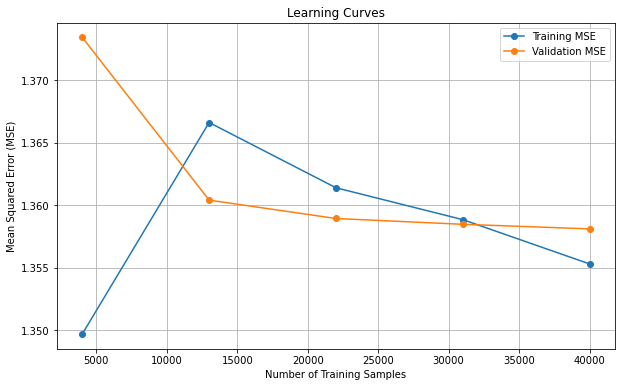

In [70]:
# Assuming you have your model (clf) and data ready
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, yTrain_num, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared errors
train_mse = -train_scores.mean(axis=1)
valid_mse = -valid_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, marker='o', label='Training MSE')
plt.plot(train_sizes, valid_mse, marker='o', label='Validation MSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curves Model 1')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Sentiment Analysis Model

In [70]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
import string

In [75]:
sid = SentimentIntensityAnalyzer()
punctuation = set(string.punctuation)

In [76]:
def review_sentiment_feature(d):
    r = ''.join([c for c in d['text'].lower() if not c in punctuation])
    sentiment = sid.polarity_scores(r)
    overall_sentiment = sentiment['compound']
    return [overall_sentiment, 1]

In [77]:
def response_sentiment_feature(d):
    if d.get('resp') and 'text' in d['resp']:
        response_text = ''.join([c for c in d['resp']['text'].lower() if c not in punctuation])
        return sid.polarity_scores(response_text)['compound']
    else:
        return 0


In [78]:
def sentiment_feature(d):
    feat = [1]

    # Calculate sentiment score for review text
    review_text = ''.join([c for c in d['text'].lower() if c not in punctuation])
    review_sentiment = sid.polarity_scores(review_text)['compound']
    feat.append(review_sentiment)

    # Calculate sentiment score for response text, if available
    if d.get('resp') and 'text' in d['resp']:
        response_text = ''.join([c for c in d['resp']['text'].lower() if c not in punctuation])
        response_sentiment = sid.polarity_scores(response_text)['compound']
    else:
        response_sentiment = 0  # Default to 0 if no response text
    feat.append(response_sentiment) 
    return feat


In [79]:
# Checking sentimate scores of review text
# Iterate through the dataset
for i, d in enumerate(dataset[:10]):
    sentiment_score = review_sentiment_feature(d)
    text = d['text']
    rating = d['rating']
    print(f"Text {i+1}: {text}")
    print(f"Rating: {rating}, Sentiment Score: {sentiment_score}\n") 


Text 1: Very Personable staff! Beautiful and clean environment. I will definitely become a regular customer!!
Rating: 5, Sentiment Score: [0.8612, 1]

Text 2: Best clothing intown
Rating: 5, Sentiment Score: [0.6369, 1]

Text 3: Not friendly at all, as I ask questions about a seat it was like I was nothing more than a bother.... I am all for supporting local businesses. However, the attitude did it for me on this one!
Rating: 1, Sentiment Score: [0.6142, 1]

Text 4: They have beautiful baby and children's clothing, shoes, cloth diapers, jewelry including amber necklaces. Cribs and bedding. Hair bows galore! I love going in to shop for my granddaughter occasionally but it's expensive! That's the only reason I don't give it 5 stars. Cute and Posh!
Rating: 4, Sentiment Score: [0.8422, 1]

Text 5: Cute shop, but the lack of boy clothes is sad. There were multiple racks of girl clothes and maybe 2 racks of boy clothes. Check out All About Baby in Huntsville instead, many more boy clothing o

In [80]:
# Checking sentimate scores of response text
# Iterate through the dataset
for i, d in enumerate(dataset[:10]):
    response_sentiment = response_sentiment_feature(d)
    response_text = d['resp']['text'] if d.get('resp') and 'text' in d['resp'] else "No response"

    print(f"Response {i+1}: {response_text}")
    print(f"Response Sentiment Score: {response_sentiment}\n")


Response 1: No response
Response Sentiment Score: 0

Response 2: No response
Response Sentiment Score: 0

Response 3: No response
Response Sentiment Score: 0

Response 4: No response
Response Sentiment Score: 0

Response 5: No response
Response Sentiment Score: 0

Response 6: Our team loves being able to help, Ellen! Glad you enjoyed coming in to figure out the best items. If you need anything, we're always here for you. -Lisa V., Owner
Response Sentiment Score: 0.9509

Response 7: I hope it's not too late to thank you for this, Jacqueline -- we love helping out however we can. If you need anything else, feel free to stop by or give us a call. -Lisa V., Owner
Response Sentiment Score: 0.9169

Response 8: Happy you stopped in, Tammie! Hoping you'll make it back our way again soon. -Lisa V., Owner
Response Sentiment Score: 0.6808

Response 9: No response
Response Sentiment Score: 0

Response 10: No response
Response Sentiment Score: 0



In [81]:
X = [sentiment_feature(d) for d in dataset]
y = [d['rating'] for d in dataset] 

# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False)  # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
predictions = clf.predict(X)

In [82]:
mse = sum((y - predictions) ** 2) / len(y)
mse

0.91194308795543

In [83]:
#Validating Sentiment Model

In [84]:
def calculate_BER(y_true, y_pred):
    TP = sum([(a and b) for (a, b) in zip(y_true, y_pred)])
    TN = sum([(not a and not b) for (a, b) in zip(y_true, y_pred)])
    FP = sum([(not a and b) for (a, b) in zip(y_true, y_pred)])
    FN = sum([(a and not b) for (a, b) in zip(y_true, y_pred)])

    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

    return 1 - 0.5 * (TPR + TNR)

def sentiment_pipeline(reg, dataTrain, dataValid, dataTest, yTrain, yValid, yTest):
    mod = LogisticRegression(C=reg, class_weight='balanced')

    # Use sentiment_feature for feature extraction
    Xtrain = [sentiment_feature(d) for d in dataTrain]
    Xvalid = [sentiment_feature(d) for d in dataValid]
    Xtest = [sentiment_feature(d) for d in dataTest]

    mod.fit(Xtrain, yTrain)
    ypredValid = mod.predict(Xvalid)
    ypredTest = mod.predict(Xtest)

    # Calculate BER for validation and test sets
    BER_valid = calculate_BER(yValid, ypredValid)
    BER_test = calculate_BER(yTest, ypredTest)

    print(f"C = {reg}; Validation BER = {BER_valid}, Test BER = {BER_test}")

    return mod, BER_valid, BER_test

In [85]:
#Tuning C
best_C = None
best_BER_valid = float('inf')
best_BER_test = float('inf')

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    _, BER_valid, BER_test = sentiment_pipeline(c, dataTrain, dataValid, dataTest, yTrain, yValid, yTest)
    print(f"C = {c}; Validation BER: {BER_valid}, Test BER: {BER_test}")

    if BER_valid < best_BER_valid:
        best_C = c
        best_BER_valid = BER_valid
        best_BER_test = BER_test

print(f"Best C: {best_C}, Best Validation BER: {best_BER_valid}, Best Test BER: {best_BER_test}")


C = 0.001; Validation BER = 0.189539516543475, Test BER = 0.18884248953206706
C = 0.001; Validation BER: 0.189539516543475, Test BER: 0.18884248953206706
C = 0.01; Validation BER = 0.18802803554292236, Test BER = 0.18815793539301917
C = 0.01; Validation BER: 0.18802803554292236, Test BER: 0.18815793539301917
C = 0.1; Validation BER = 0.1880896226026667, Test BER = 0.18797597551153156
C = 0.1; Validation BER: 0.1880896226026667, Test BER: 0.18797597551153156
C = 1; Validation BER = 0.18806525622884895, Test BER = 0.1880097114267869
C = 1; Validation BER: 0.18806525622884895, Test BER: 0.1880097114267869
C = 10; Validation BER = 0.18807648007728206, Test BER = 0.18802095673187202
C = 10; Validation BER: 0.18807648007728206, Test BER: 0.18802095673187202
C = 100; Validation BER = 0.18807648007728206, Test BER = 0.18802095673187202
C = 100; Validation BER: 0.18807648007728206, Test BER: 0.18802095673187202
Best C: 0.01, Best Validation BER: 0.18802803554292236, Best Test BER: 0.18815793539

In [86]:
#Call pipeline with C = .01 
sentiment_pipeline(.01, dataTrain, dataValid, dataTest, yTrain, yValid, yTest)

C = 0.01; Validation BER = 0.18802803554292236, Test BER = 0.18815793539301917


(LogisticRegression(C=0.01, class_weight='balanced'),
 0.18802803554292236,
 0.18815793539301917)

In [89]:
# Regularized regression
X_train = [sentiment_feature(d) for d in dataTrain]

clf = linear_model.Ridge(alpha=1.0, fit_intercept=False)
clf.fit(X_train, yTrain_num)
theta = clf.coef_

# Extract features for validation and test data
X_valid = [sentiment_feature(d) for d in dataValid]
X_test = [sentiment_feature(d) for d in dataTest]

# Make predictions on validation and test data
predictions_valid = clf.predict(X_valid)
predictions_test = clf.predict(X_test)

In [90]:
# Calculate Mean Squared Error (MSE) for validation and test sets
mse_valid = mean_squared_error(yValid_num, predictions_valid)
mse_test = mean_squared_error(yTest_num, predictions_test)

print("Validation MSE:", mse_valid)
print("Test MSE:", mse_test)


Validation MSE: 0.9097335310838123
Test MSE: 0.9108771627538296


In [91]:
# Calculate accuracy using a threshold
threshold = 3
binary_predictions_valid = [1 if p >= threshold else 0 for p in predictions_valid]
binary_predictions_test = [1 if p >= threshold else 0 for p in predictions_test]

accuracy_valid = accuracy_score(yValid, binary_predictions_valid)
accuracy_test = accuracy_score(yTest, binary_predictions_test)

print("Validation Accuracy:", accuracy_valid)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.91448
Test Accuracy: 0.9141


In [92]:
#Plots of Model 2

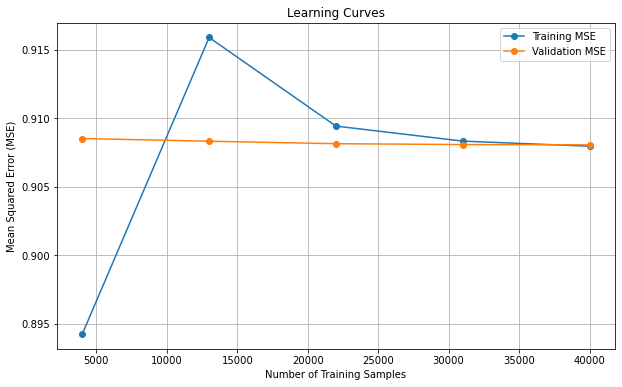

In [93]:
train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, yTrain_num, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared errors
train_mse = -train_scores.mean(axis=1)
valid_mse = -valid_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, marker='o', label='Training MSE')
plt.plot(train_sizes, valid_mse, marker='o', label='Validation MSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curves Model 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Model 2 and significant coefficients from model 1

In [94]:
def sentiment_feature2(d, max_length):
    feat = [1]

    # Calculate sentiment score for review text
    review_text = ''.join([c for c in d['text'].lower() if c not in punctuation])
    review_sentiment = sid.polarity_scores(review_text)['compound']
    feat.append(review_sentiment)

    # Calculate sentiment score for response text, if available
    if d.get('resp') and 'text' in d['resp']:
        response_text = ''.join([c for c in d['resp']['text'].lower() if c not in punctuation])
        response_sentiment = sid.polarity_scores(response_text)['compound']
    else:
        response_sentiment = 0  # Default to 0 if no response text
    feat.append(response_sentiment) 

    # Additional features
    feat.append(len(d['text']) / max_length)  # Length of 'text' normalized by max_length
    feat.extend(one_hot_hour(t.hour))  # One-hot encoding for hour of the day
    feat.append(1 if d['pics'] is not None else 0)  # Presence of pictures

    return feat


In [95]:
X = [sentiment_feature2(d, max_length) for d in dataset]
y = [d['rating'] for d in dataset] 

# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False)  # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
predictions = clf.predict(X)

In [96]:
mse = sum((y - predictions) ** 2) / len(y)
mse

0.8390368071835136

In [97]:
#Validating Sentiment2 Model

In [98]:
#Subsetting dataset into Training and Testing 
dataTrain = data[:50000]
dataValid = data[50000:100000]
dataTest = data[100000:150000]

In [99]:
#Predicting positive ratings (3 or greater)
yTrain_bin = [d['rating'] >= 3 for d in dataTrain]
yValid_bin = [d['rating'] >= 3 for d in dataValid]
yTest_bin = [d['rating'] >= 3 for d in dataTest]

In [100]:
#Predicting numerical ratings
yTrain_num = [d['rating'] for d in dataTrain]
yValid_num = [d['rating'] for d in dataValid]
yTest_num = [d['rating'] for d in dataTest]

In [101]:
# Train model on the training data
X_train = [sentiment_feature2(d, max_length) for d in dataTrain]

# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False)  # MSE + 1.0 l2
clf.fit(X_train, yTrain_num)
theta = clf.coef_


In [102]:
# Make predictions on the validation and test data
X_valid = [sentiment_feature2(d, max_length) for d in dataValid]
X_test = [sentiment_feature2(d, max_length) for d in dataTest]

predictions_valid = clf.predict(X_valid)
predictions_test = clf.predict(X_test)

In [103]:
# Calculate Mean Squared Error (MSE) for validation and test sets
mse_valid = mean_squared_error(yValid_num, predictions_valid)
mse_test = mean_squared_error(yTest_num, predictions_test)

In [104]:
print("Validation MSE:", mse_valid)
print("Test MSE:", mse_test)

Validation MSE: 0.8354537564362328
Test MSE: 0.8385724141020261


In [105]:
def calculate_BER(y_true, y_pred):
    TP = sum([(a and b) for (a, b) in zip(y_true, y_pred)])
    TN = sum([(not a and not b) for (a, b) in zip(y_true, y_pred)])
    FP = sum([(not a and b) for (a, b) in zip(y_true, y_pred)])
    FN = sum([(a and not b) for (a, b) in zip(y_true, y_pred)])

    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0

    return 1 - 0.5 * (TPR + TNR)

def sentiment_pipeline2(reg, dataTrain, dataValid, dataTest, yTrain, yValid, yTest, max_length):
    mod = LogisticRegression(C=reg, class_weight='balanced')

    Xtrain = [sentiment_feature2(d, max_length) for d in dataTrain]
    Xvalid = [sentiment_feature2(d, max_length) for d in dataValid]
    Xtest = [sentiment_feature2(d, max_length) for d in dataTest]

    mod.fit(Xtrain, yTrain)
    ypredValid = mod.predict(Xvalid)
    ypredTest = mod.predict(Xtest)

    BER_valid = calculate_BER(yValid, ypredValid)
    BER_test = calculate_BER(yTest, ypredTest)

    print(f"C = {reg}; Validation BER = {BER_valid}, Test BER = {BER_test}")

    return mod, BER_valid, BER_test


In [106]:
# Tuning C
best_C = None
best_BER_valid = float('inf')
best_BER_test = float('inf')

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    _, BER_valid, BER_test = sentiment_pipeline2(c, dataTrain, dataValid, dataTest, yTrain_bin, yValid_bin, yTest_bin, max_length)
    print(f"C = {c}; Validation BER: {BER_valid}, Test BER: {BER_test}")

    if BER_valid < best_BER_valid:
        best_C = c
        best_BER_valid = BER_valid
        best_BER_test = BER_test

print(f"Best C: {best_C}, Best Validation BER: {best_BER_valid}, Best Test BER: {best_BER_test}")


C = 0.001; Validation BER = 0.18930218526270326, Test BER = 0.18833678996992387
C = 0.001; Validation BER: 0.18930218526270326, Test BER: 0.18833678996992387
C = 0.01; Validation BER = 0.18635539391310685, Test BER = 0.1868299718929114
C = 0.01; Validation BER: 0.18635539391310685, Test BER: 0.1868299718929114
C = 0.1; Validation BER = 0.18048819508066383, Test BER = 0.17890897355483215
C = 0.1; Validation BER: 0.18048819508066383, Test BER: 0.17890897355483215
C = 1; Validation BER = 0.16685437311109141, Test BER = 0.16726351067555179
C = 1; Validation BER: 0.16685437311109141, Test BER: 0.16726351067555179
C = 10; Validation BER = 0.16308190836846848, Test BER = 0.16374587079282155
C = 10; Validation BER: 0.16308190836846848, Test BER: 0.16374587079282155
C = 100; Validation BER = 0.16285714318652944, Test BER = 0.16381198595658197
C = 100; Validation BER: 0.16285714318652944, Test BER: 0.16381198595658197
Best C: 100, Best Validation BER: 0.16285714318652944, Best Test BER: 0.163811

In [107]:
#Calculate accuracy
threshold = 3
binary_predictions_valid = [1 if p >= threshold else 0 for p in predictions_valid]
binary_predictions_test = [1 if p >= threshold else 0 for p in predictions_test]

accuracy_valid = accuracy_score(yValid_bin, binary_predictions_valid)
accuracy_test = accuracy_score(yTest_bin, binary_predictions_test)

In [108]:
print("Validation Accuracy:", accuracy_valid)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.91748
Test Accuracy: 0.9167


In [ ]:
#Plot for Model 3

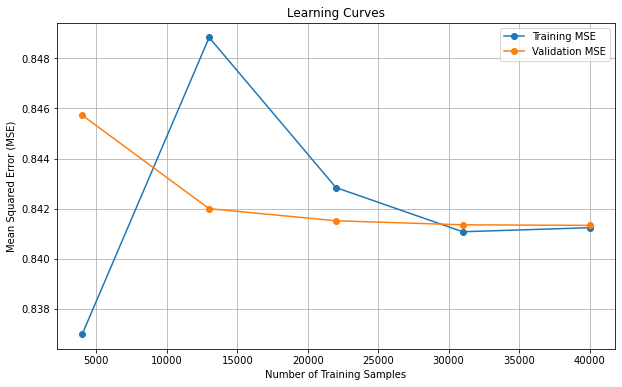

In [109]:
train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, yTrain_num, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared errors
train_mse = -train_scores.mean(axis=1)
valid_mse = -valid_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, marker='o', label='Training MSE')
plt.plot(train_sizes, valid_mse, marker='o', label='Validation MSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curves Model 3')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Business Rating Predictions - using similarity analysis

In [110]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [111]:
def calculate_business_similarity(data):
    business_similarity = {}

    # Create sets of users who reviewed each business
    users_per_business = defaultdict(set)
    for d in data:
        business_id, user_id = d['gmap_id'], d['user_id']
        users_per_business[business_id].add(user_id)

    # Calculate Jaccard similarities between businesses
    for business_id1 in users_per_business.keys():
        similarities = []
        users1 = users_per_business[business_id1]
        for business_id2 in users_per_business:
            if business_id1 == business_id2:
                continue
            users2 = users_per_business[business_id2]
            jaccard_similarity = Jaccard(users1, users2)
            similarities.append((jaccard_similarity, business_id2))
        similarities.sort(reverse=True)
        business_similarity[business_id1] = similarities[:5]

    return business_similarity

In [112]:
def similarity_feature(d, max_length, business_similarity):
    feat = [1]

    # Calculate sentiment score for review text
    review_text = ''.join([c for c in d['text'].lower() if c not in punctuation])
    review_sentiment = sid.polarity_scores(review_text)['compound']
    feat.append(review_sentiment)

    # Calculate sentiment score for response text
    if d.get('resp') and 'text' in d['resp']:
        response_text = ''.join([c for c in d['resp']['text'].lower() if c not in punctuation])
        response_sentiment = sid.polarity_scores(response_text)['compound']
    else:
        response_sentiment = 0  # Default to 0 if no response text
    feat.append(response_sentiment) 

    # Additional features
    feat.append(len(d['text']) / max_length)  # Length of 'text' normalized by max_length
    feat.extend(one_hot_hour(t.hour))  # One-hot encoding for hour of the day
    feat.append(1 if d['pics'] is not None else 0)  # Presence of pictures
    
    # Jaccard similarity feature
    business_id = d['gmap_id']
    jaccard_sims = [similarity for similarity, _ in business_similarity.get(business_id, [])] 
    feat.extend(jaccard_sims) 
    return feat


In [113]:
# Calculate business similarity
business_similarity = calculate_business_similarity(dataset)

In [114]:
X = [similarity_feature(d, max_length, business_similarity) for d in dataset]
y = [d['rating'] for d in dataset]

# Regularized regression
clf = linear_model.Ridge(1.0, fit_intercept=False)  # MSE + 1.0 l2
clf.fit(X, y)
theta = clf.coef_
predictions = clf.predict(X)

In [115]:
mse = sum((y - predictions) ** 2) / len(y)
mse

0.8384688610926418

In [116]:
#Validating Similarity Model

In [126]:
#Subsetting dataset into Training and Testing 
dataTrain = data[:50000]
dataValid = data[50000:100000]
dataTest = data[100000:150000]

In [127]:
#Predicting positive ratings (3 or greater)
yTrain_bin = [d['rating'] >= 3 for d in dataTrain]
yValid_bin = [d['rating'] >= 3 for d in dataValid]
yTest_bin = [d['rating'] >= 3 for d in dataTest]

In [128]:
#Predicting numerical ratings
yTrain_num = [d['rating'] for d in dataTrain]
yValid_num = [d['rating'] for d in dataValid]
yTest_num = [d['rating'] for d in dataTest]

In [133]:
# Calculate business similarity
business_similarity = calculate_business_similarity(dataTrain)

In [134]:
X_train = [similarity_feature(d, max_length, business_similarity) for d in dataTrain]
y_train = [d['rating'] for d in dataTrain]

In [137]:
# Regularized regression
clf = Ridge(alpha=1.0, fit_intercept=False)  # Ridge regression with alpha=1.0
clf.fit(X_train, yTrain_num)
theta = clf.coef_

In [147]:
business_similarity_test = calculate_business_similarity(dataTest)

In [148]:
business_similarity_valid = calculate_business_similarity(dataValid)

In [149]:
X_valid = [similarity_feature(d, max_length, business_similarity_valid) for d in dataValid]
X_test = [similarity_feature(d, max_length, business_similarity_test) for d in dataTest]

In [150]:
# Make predictions on validation and test data
predictions_valid = clf.predict(X_valid)
predictions_test = clf.predict(X_test)

# Calculate Mean Squared Error (MSE) for validation and test sets
mse_valid = mean_squared_error(yValid_num, predictions_valid)
mse_test = mean_squared_error(yTest_num, predictions_test)

print("Validation MSE:", mse_valid)
print("Test MSE:", mse_test)

Validation MSE: 0.8352742378434485
Test MSE: 0.8383827011043296


In [151]:
# Calculate accuracy using a threshold
threshold = 3
binary_predictions_valid = [1 if p >= threshold else 0 for p in predictions_valid]
binary_predictions_test = [1 if p >= threshold else 0 for p in predictions_test]

accuracy_valid = accuracy_score(yValid_bin, binary_predictions_valid)
accuracy_test = accuracy_score(yTest_bin, binary_predictions_test)

print("Validation Accuracy:", accuracy_valid)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.91738
Test Accuracy: 0.91664


In [162]:
def similarity_pipeline(reg, dataTrain, dataValid, dataTest, yTrain, yValid, yTest, max_length, business_similarity):
    mod = LogisticRegression(C=reg, class_weight='balanced')

    Xtrain = [similarity_feature(d, max_length, business_similarity) for d in dataTrain]
    Xvalid = [similarity_feature(d, max_length, business_similarity_valid) for d in dataValid]
    Xtest = [similarity_feature(d, max_length, business_similarity_test) for d in dataTest]

    mod.fit(Xtrain, yTrain)
    ypredValid = mod.predict(Xvalid)
    ypredTest = mod.predict(Xtest)

    # Calculate Balanced Error Rate (BER) using balanced_accuracy_score
    BER_valid = 1 - balanced_accuracy_score(yValid, ypredValid)
    BER_test = 1 - balanced_accuracy_score(yTest, ypredTest)

    print(f"C = {reg}; Validation BER = {BER_valid}, Test BER = {BER_test}")

    return mod, BER_valid, BER_test


In [163]:
# Tuning C
best_C = None
best_BER_valid = float('inf')
best_BER_test = float('inf')

# Define a list of candidate C values to try
candidate_C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in candidate_C_values:
    _, BER_valid, BER_test = similarity_pipeline(c, dataTrain, dataValid, dataTest, yTrain_bin, yValid_bin, yTest_bin, max_length, business_similarity)
    print(f"C = {c}; Validation BER: {BER_valid}, Test BER: {BER_test}")

    if BER_valid < best_BER_valid:
        best_C = c
        best_BER_valid = BER_valid
        best_BER_test = BER_test

print(f"Best C: {best_C}, Best Validation BER: {best_BER_valid}, Best Test BER: {best_BER_test}")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (50000,) + inhomogeneous part.

In [ ]:
#Plot for model 4

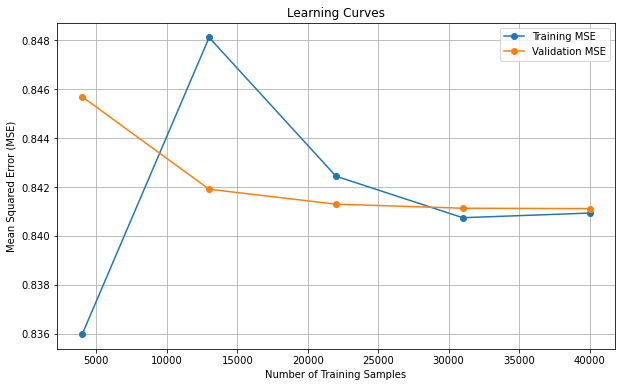

In [164]:
train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, yTrain_num, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared errors
train_mse = -train_scores.mean(axis=1)
valid_mse = -valid_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, marker='o', label='Training MSE')
plt.plot(train_sizes, valid_mse, marker='o', label='Validation MSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()